In [1]:
import seaborn as sns
sns.set_palette('colorblind')

import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append('../')

from library_analyzer import Library
from matplotlib.colors import TwoSlopeNorm

In [18]:
replicates = {'rep1':['P0_R1','P10_R1'],
              'rep2':['P0_R2','P10_R2']}
id_cols = ['id']
process_call = 'id'
mut_id_regex = '(?P<Mut_num>\d*)pt_(?P<Position>\d*)(?P<AA>[\w*]*)_v(?P<Version>\d*)'
group_cols = ['Position','AA']
rate_method = 'l2fc'

data_file = './OCAT1_Library.xlsx'
sheet_name = 'Original_Data'

aa_keys = np.array('R,H,K,D,E,S,T,N,Q,A,V,I,L,M,F,Y,W,C,G,P,*'.split(','))

control_column = 'AA'
positive_values = ['WT']
negative_values = ['*']

wt_aa = 'ESVPGDYSKRVYQGVRVKHTVKDLLAEKRSGQTSNSRLNGSVSSSQSPFVQ'

# colorscheme = 'RdBu'
WT_color = 'xkcd:violet'

feature_sets=[
    {'name':'Segment resolved','positions':[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32], 'color':'xkcd:red'},
    {'name':'DNA interface','positions':[12,13,14,15,16,17,18,19], 'color':'xkcd:orchid'},
     {'name':'POU2F3 interface','positions':[12,13,14,15,16,18,19,20,21,22,23,25,26,29,30], 'color':'xkcd:green'},
      {'name':'Structural','positions':[12,13,14,17,21,24], 'color':'xkcd:salmon'}
]

sunset_cmap = sns.blend_palette(["#5767FE", '#918AF3','#D9D6DA' , "#FFFFCC", '#FED9A4' ,"#FFB077", '#FF0000'],as_cmap=True)
to_red_cmap = sns.blend_palette(['#990000','#FF0000','#FF6666','#FFCCCC', 'xkcd:white'][::-1],as_cmap=True)

In [3]:
lib = Library.build_from_reads(data_file, replicates, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)

lib.data_df

FC                l2fc           meta                           \
          rep1      rep2      rep1      rep2   AA Mut_num Position Version   
0     0.569378  0.354172 -0.812541 -1.497476    K       1       01       5   
1     0.550257  0.599974 -0.861822 -0.737027    K       1       01       2   
2     0.598239  0.329348 -0.741206 -1.602317    K       1       01       4   
3     0.507237  0.532823 -0.979267 -0.908272    K       1       01       3   
4     0.577501  0.392472 -0.792105 -1.349338    K       1       01       1   
...        ...       ...       ...       ...  ...     ...      ...     ...   
5983  1.145040  0.375589  0.195398 -1.412772    F       1       01       2   
5984  0.568935  0.283656 -0.813665 -1.817788    F       1       01       4   
5985  0.808351  0.597970 -0.306946 -0.741855    F       1       01       5   
5986  0.856487  0.307829 -0.223497 -1.699798    F       1       01       3   
5987  0.735868  0.895887 -0.442480 -0.158612    F       1       01       1   

                 rep1_abundance           rep1_counts        rep2_abundance  \
              id          P0_R1    P10_R1       P0_R1 P10_R1          P0_R2   
0     1pt_01K_v5       0.000196  0.000111        6929   2246       0.000186   
1     1pt_01K_v2       0.000107  0.000059        3786   1186       0.000053   
2     1pt_01K_v4       0.000233  0.000139        8239   2806       0.000217   
3     1pt_01K_v3       0.000089  0.000045        3134    905       0.000049   
4     1pt_01K_v1       0.000210  0.000122        7449   2449       0.000190   
...          ...            ...       ...         ...    ...            ...   
5983  1pt_01F_v2       0.000192  0.000220        6802   4434       0.000203   
5984  1pt_01F_v4       0.000101  0.000057        3566   1155       0.000102   
5985  1pt_01F_v5       0.000124  0.000100        4396   2023       0.000097   
5986  1pt_01F_v3       0.000239  0.000205        8464   4127       0.000247   
5987  1pt_01F_v1       0.000047  0.000034        1659    695       0.000023   

               rep2_counts         
        P10_R2       P0_R2 P10_R2  
0     0.000066        4746   2679  
1     0.000032        1348   1289  
2     0.000072        5540   2908  
3     0.000026        1260   1070  
4     0.000074        4836   3025  
...        ...         ...    ...  
5983  0.000076        5177   3099  
5984  0.000029        2588   1170  
5985  0.000058        2470   2354  
5986  0.000076        6286   3084  
5987  0.000021         596    851  

[5988 rows x 17 columns]

# Making heatmaps
This section makes a heatmap of the OCAT1 library.

In [4]:
fits = lib.total_average_frame
wts = fits['AA'].isin(['WT'])
fits['l2fc mean'] = fits['l2fc mean']-fits[wts]['l2fc mean'].mean()

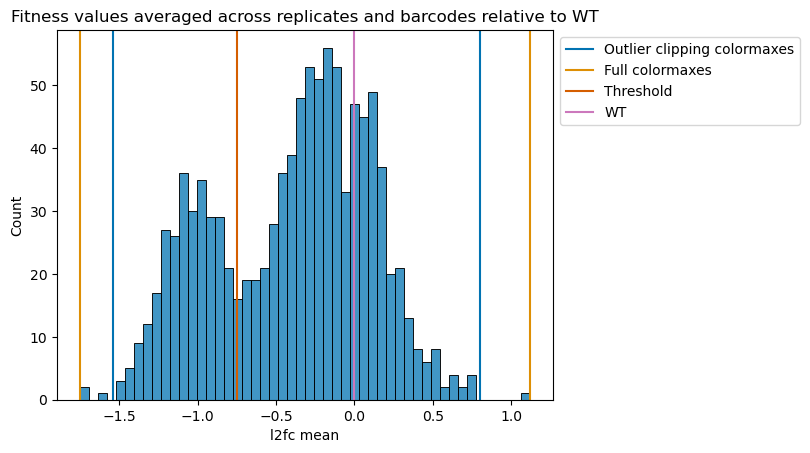

In [5]:
#This cell identifies reasonable colormap edges

sns.histplot(fits['l2fc mean'], bins=50)
plt.axvline(0.8, label='Outlier clipping colormaxes')
plt.axvline(-1.54)

plt.axvline(fits['l2fc mean'].max(), color='C1', label='Full colormaxes')
plt.axvline(fits['l2fc mean'].min(), color='C1')

dead_thresh =  -0.75
plt.axvline(dead_thresh, color='C3', label='Threshold')

plt.axvline(fits[fits.AA=='WT'].iloc[0]['l2fc mean'], color='C4', label='WT')


plt.legend(bbox_to_anchor=(1,1))
plt.title('Fitness values averaged across replicates and barcodes relative to WT')
plt.show()

In [6]:
# This cell makes a colormap with the colormap max and min brought close to the majority of the data at the expense of having outliers max out the scale

plot_features = True
plot_mutability = True
plot_properties = True

norm = TwoSlopeNorm(vcenter=0, vmin=-1.54, vmax=0.8)

heatmap_fig, axd = lib.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=2,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=dead_thresh,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()

In [7]:
# This cell makes a colormap with the colormap max and min at the actual max and min of the data, this avoids oversaturating data at the edges but mutes subtle/weak effects a bit

plot_features = True
plot_mutability = True
plot_properties = True

norm = TwoSlopeNorm(vcenter=0, vmax=fits['l2fc mean'].max(), vmin=fits['l2fc mean'].min())

heatmap_fig, axd = lib.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=2,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=dead_thresh,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()

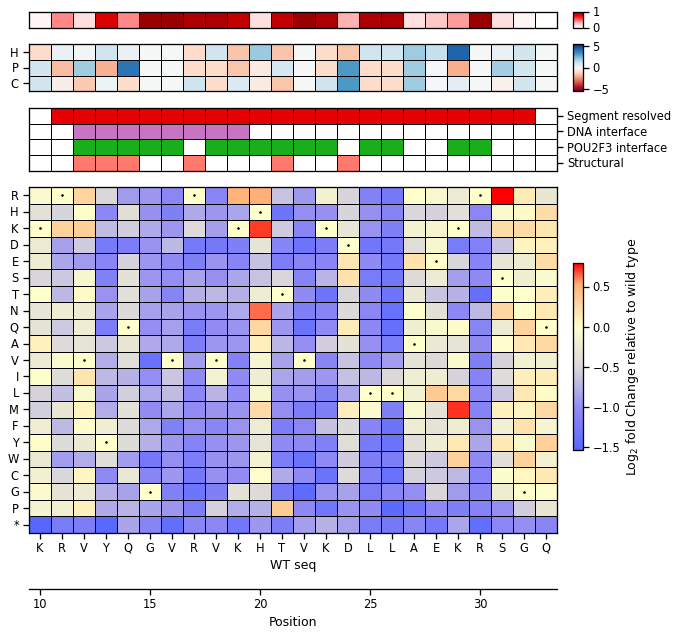

In [29]:
# This cell makes a colormap with the colormap max and min brought close to the majority of the data at the expense of having outliers max out the scale
# And crops to the relevant section as well as resizing the image and reducing DPI

plot_features = True
plot_mutability = True
plot_properties = True

norm = TwoSlopeNorm(vcenter=0, vmin=-1.54, vmax=0.8)

heatmap_fig, axd = lib.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=2,
                                       rc_params={"figure.figsize" : (10,10), 'figure.dpi':75}, grid=0.5, invert_mutability=True,
                                       thresh=dead_thresh,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm,allow_multi_rows=False, plot_pos=(10,34)
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()

In [10]:
print('Variant Fitness Values')
display(lib.fitness_frame)

print('Variant Fitness Values averaged over replicates')
display(lib.rep_average_frame)

print('Fitness Values averaged over variants')
display(lib.group_average_frame)

print('Fitness Values averaged over replicates and variants')
display(lib.total_average_frame)

Variant Fitness Values


Position AA          id  l2fc rep1  l2fc rep2
0          01  K  1pt_01K_v5  -0.812541  -1.497476
1          01  K  1pt_01K_v2  -0.861822  -0.737027
2          01  K  1pt_01K_v4  -0.741206  -1.602317
3          01  K  1pt_01K_v3  -0.979267  -0.908272
4          01  K  1pt_01K_v1  -0.792105  -1.349338
...       ... ..         ...        ...        ...
5983       01  F  1pt_01F_v2   0.195398  -1.412772
5984       01  F  1pt_01F_v4  -0.813665  -1.817788
5985       01  F  1pt_01F_v5  -0.306946  -0.741855
5986       01  F  1pt_01F_v3  -0.223497  -1.699798
5987       01  F  1pt_01F_v1  -0.442480  -0.158612

[5988 rows x 5 columns]

Variant Fitness Values averaged over replicates


Position AA          id  l2fc mean  l2fc std
0          01  K  1pt_01K_v5  -1.155008  0.484323
1          01  K  1pt_01K_v2  -0.799424  0.088243
2          01  K  1pt_01K_v4  -1.171761  0.608898
3          01  K  1pt_01K_v3  -0.943769  0.050201
4          01  K  1pt_01K_v1  -1.070722  0.394023
...       ... ..         ...        ...       ...
5983       01  F  1pt_01F_v2  -0.608687  1.137148
5984       01  F  1pt_01F_v4  -1.315726  0.710022
5985       01  F  1pt_01F_v5  -0.524401  0.307527
5986       01  F  1pt_01F_v3  -0.961648  1.043902
5987       01  F  1pt_01F_v1  -0.300546  0.200725

[5988 rows x 5 columns]

Fitness Values averaged over variants


/Users/jackdesmarais/Documents/Kinney_lab/DMS_designer/library_analysis/examples/../library_analyzer.py:395: FutureWarning: ['id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df.groupby(self.group_cols).agg(['mean','std'],axis=1).rename(mapper=lambda x: f'{self.fitness_measure} {x}',


Position  AA l2fc rep1           l2fc rep2          
                  l2fc mean  l2fc std l2fc mean  l2fc std
0              WT  0.067687  0.474682 -0.488420  0.551796
1          01   * -1.659522  0.273091 -2.229968  0.559838
2          01   A -0.674390  0.313521 -1.254015  0.557710
3          01   C -0.880535  0.281782 -1.111005  0.427121
4          01   D -0.165613  0.355786 -0.779446  0.342840
...       ...  ..       ...       ...       ...       ...
1016       51   S -0.155003  0.698977 -1.139292  0.938766
1017       51   T -0.535109  0.292932 -1.064154  0.405252
1018       51   V -0.378907  0.235635 -1.006754  0.618476
1019       51   W -1.332841  0.167609 -1.992744  0.272572
1020       51   Y -0.748087  0.206361 -1.102651  0.695212

[1021 rows x 6 columns]

Fitness Values averaged over replicates and variants


Position  AA  l2fc mean
0              WT  -0.210367
1          01   *  -1.944745
2          01   A  -0.964202
3          01   C  -0.995770
4          01   D  -0.472530
...       ...  ..        ...
1016       51   S  -0.647147
1017       51   T  -0.799632
1018       51   V  -0.692830
1019       51   W  -1.662792
1020       51   Y  -0.925369

[1021 rows x 3 columns]

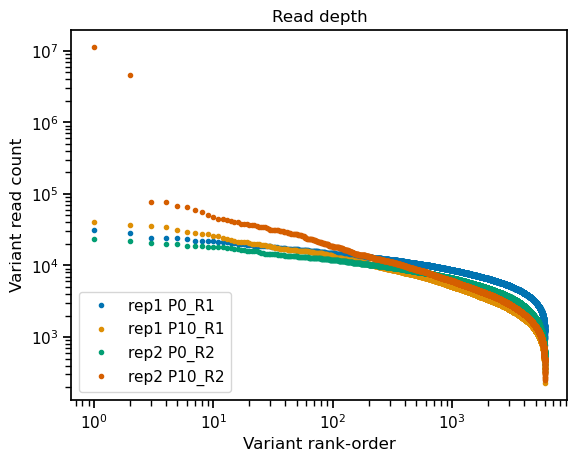

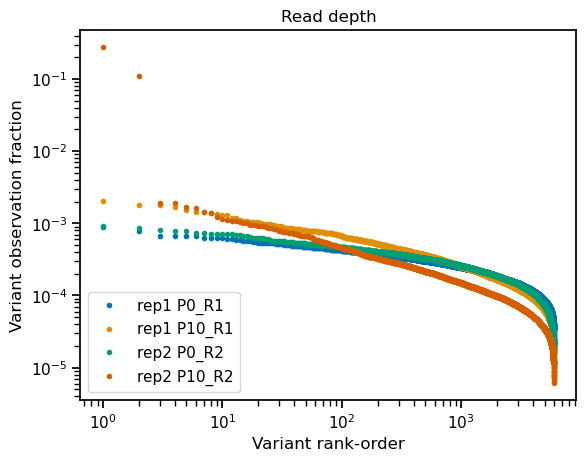

In [11]:
lib.check_depth()
plt.show()

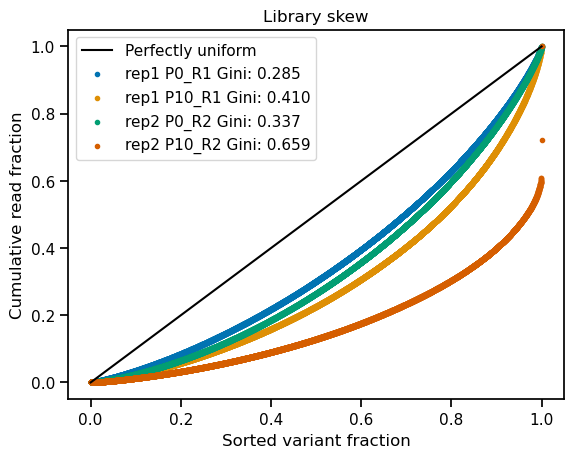

In [12]:
lib.check_skew()
plt.show()

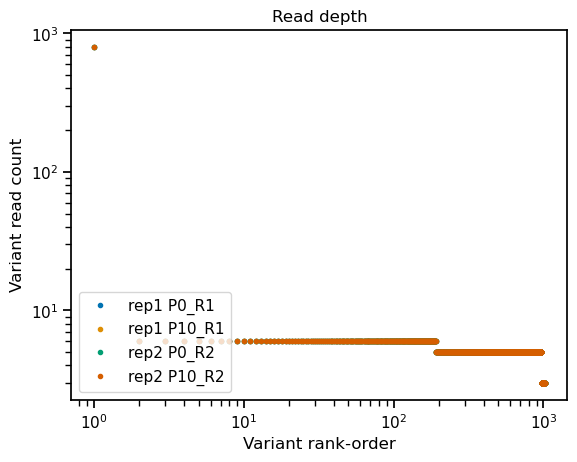

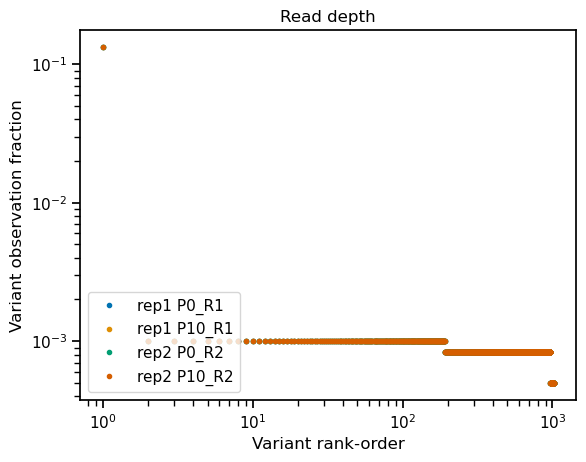

In [13]:
lib.check_barcode_distribution_depth()
plt.show()

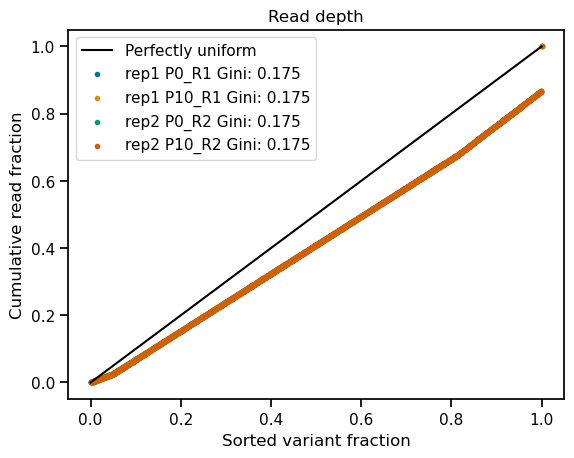

In [14]:
lib.check_barcode_distribution_skew()
plt.show()

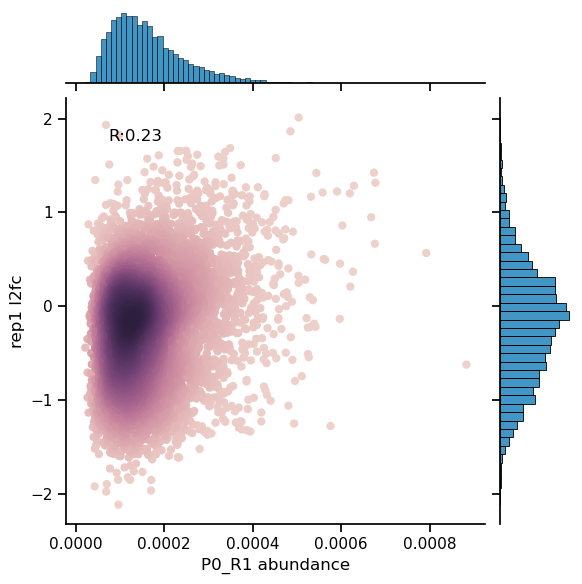

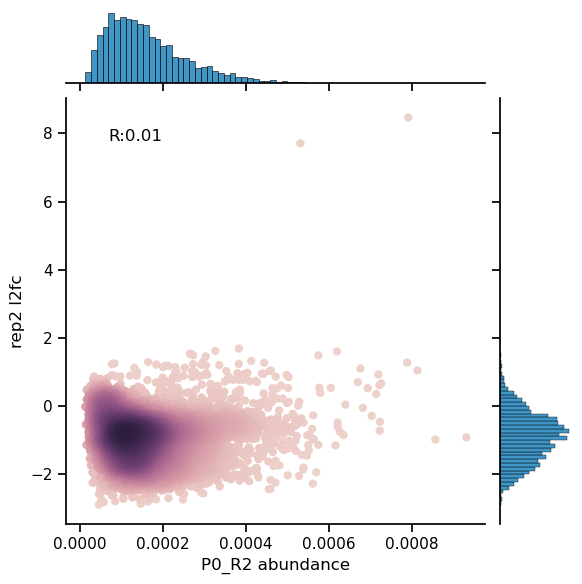

In [15]:
lib.make_initial_skew_checks()
plt.show()

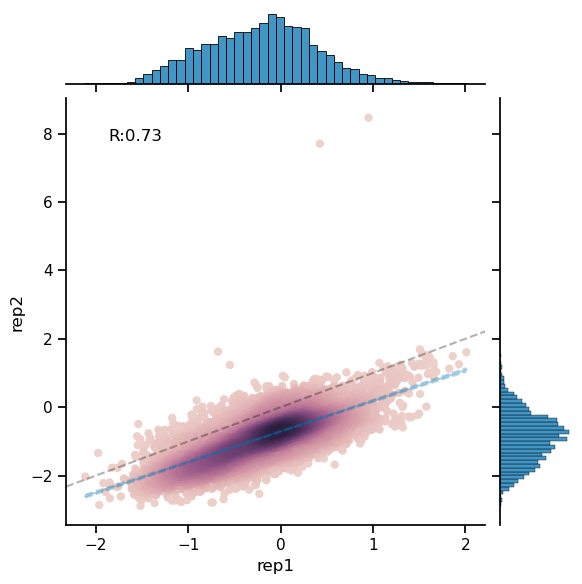

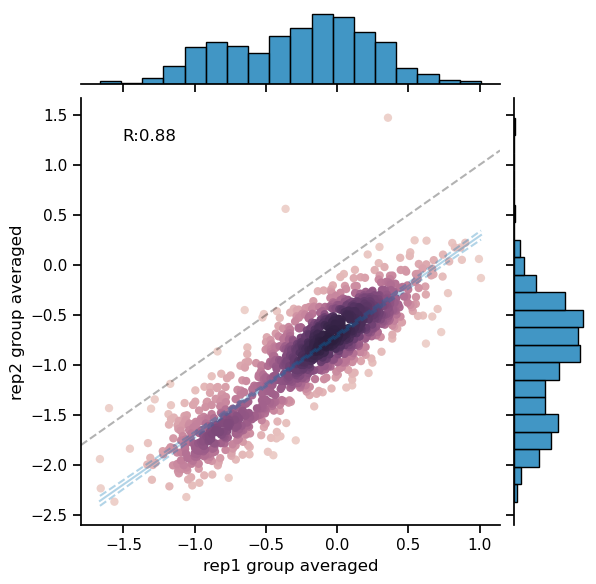

In [16]:
lib.make_replicate_checks()
plt.show()

Number of true positives: 800
rep1 The optimal threshold range is from -0.5493156894444859 to -0.5455850111105938
The ROCs at specific thresholds are- opt min: [0.84589052], opt max: [0.84589052]
The TPRs at specific thresholds are- opt min: [0.91125], opt max: [0.91125]
The FPRs at specific thresholds are- opt min: [0.06535948], opt max: [0.06535948]
The optimal f-score threshold range is from -0.8030018161491541 to -0.7992711378152619
The optimal g-mean threshold range is from -0.8030018161491541 to -0.7992711378152619
rep2 The optimal threshold range is from -0.9335668649295394 to -0.9335668649295394
The ROCs at specific thresholds are- opt min: [0.74367647], opt max: [0.74367647]
The TPRs at specific thresholds are- opt min: [0.8025], opt max: [0.8025]
The FPRs at specific thresholds are- opt min: [0.05882353], opt max: [0.05882353]
The optimal f-score threshold range is from -1.588286298977299 to -1.5794981186545103
The optimal g-mean threshold range is from -1.588286298977299 to 

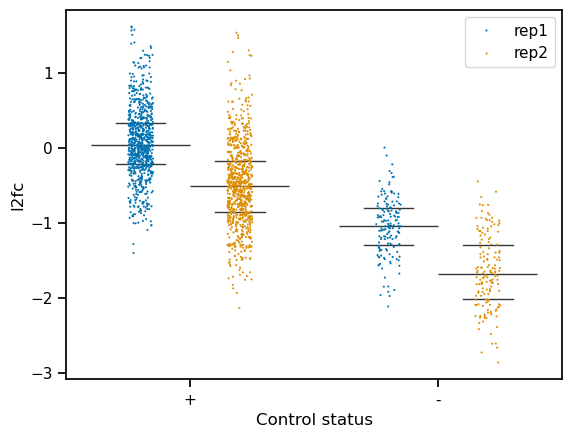

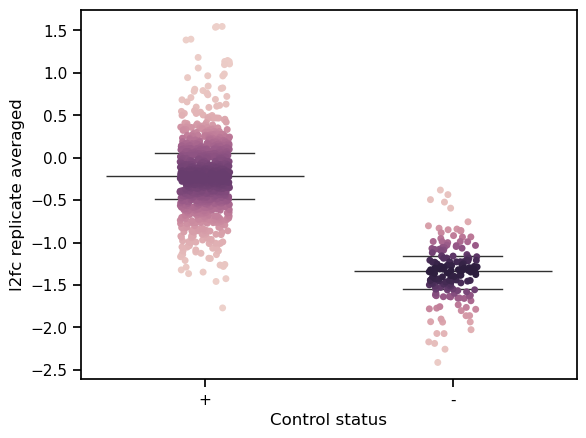

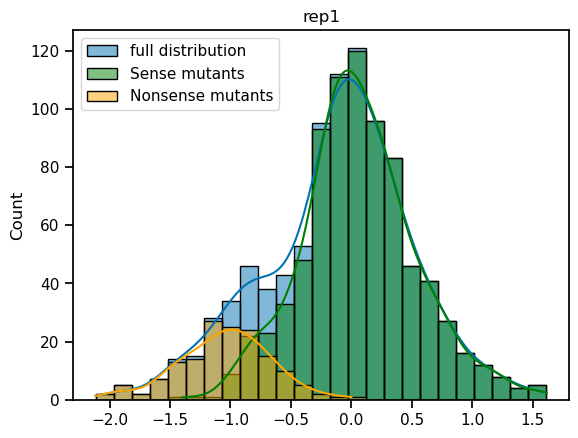

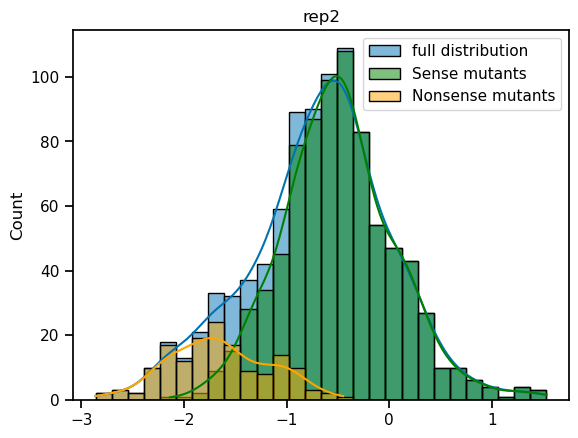

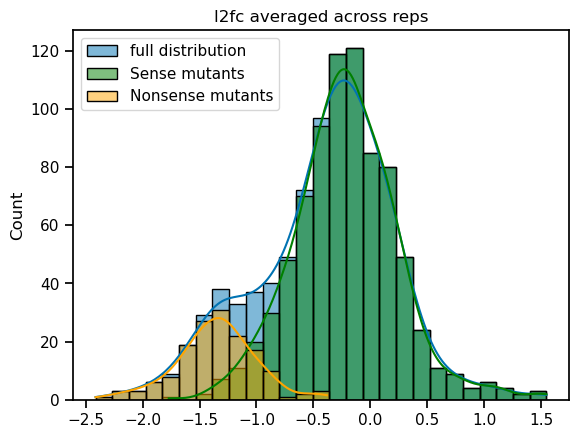

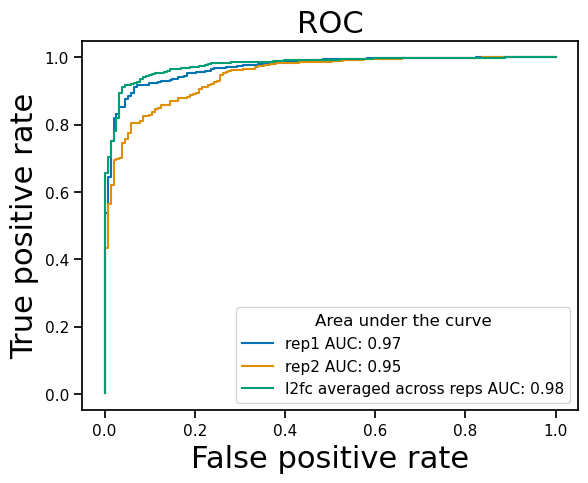

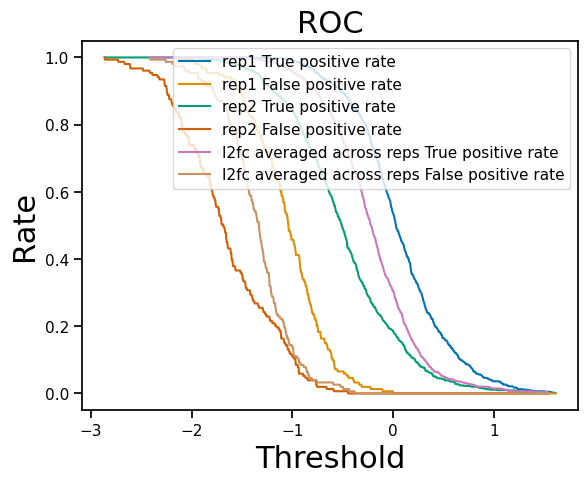

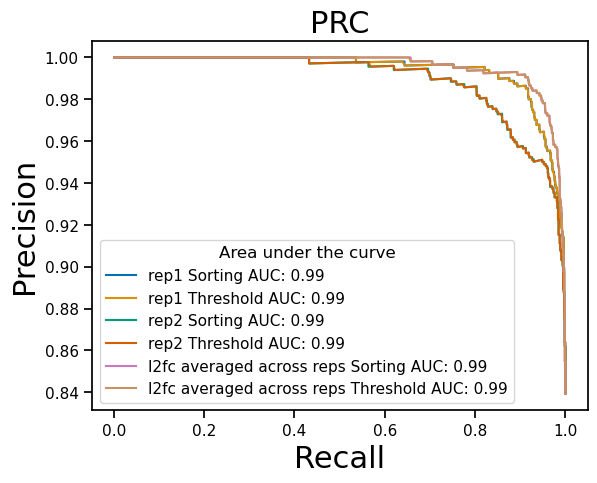

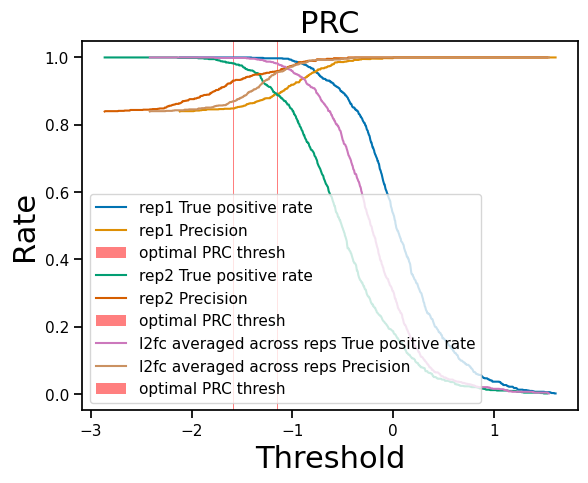

In [17]:
lib.check_controls(control_column, positive_values, negative_values)
plt.show()

# Plot the replicate heatmaps seperately

In [35]:
lib_rep1 = Library.build_from_reads(data_file, {'rep1':['P0_R1','P10_R1']}, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)




from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=fits['l2fc mean'].max(), vmin=fits['l2fc mean'].min())


plot_features = True
plot_mutability = False
plot_properties = False


heatmap_fig, axd = lib_rep1.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()


In [36]:
lib_rep2 = Library.build_from_reads(data_file, {'rep2':['P0_R2','P10_R2']}, id_cols, group_cols, rate_method, aa_keys, wt_aa, process_call, mut_id_regex, sheet_name=sheet_name)




from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vcenter=0, vmax=fits['l2fc mean'].max(), vmin=fits['l2fc mean'].min())


plot_features = True
plot_mutability = False
plot_properties = False


heatmap_fig, axd = lib_rep2.make_singles_heatmap(control_col='AA',WT_vals=['WT'],stop_vals=['*'], seq_start=1,
                                       rc_params={"figure.figsize" : (15,7), 'figure.dpi':1000}, grid=0.5, invert_mutability=True,
                                       thresh=-0.5,feature_sets=feature_sets, main_cmap=sunset_cmap, mutability_cmap=to_red_cmap,
                                       plot_features=plot_features, plot_mutability=plot_mutability, plot_properties=plot_properties,
                                       norm=norm
                                       )

cbar_width = 0.0135
cbar_height = 0.25
cbar_left_shift = -0.05
axd['mutant_cmap'].set_yscale('linear')
cbar_pos = axd['mutant_cmap'].get_position()
axd['mutant_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1]+0.11, cbar_width, cbar_height))

if plot_mutability:
    axd['mutability_cmap'].set_yscale('linear')
    cbar_pos = axd['mutability_cmap'].get_position()
    axd['mutability_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
if plot_properties:
    axd['property_cmap'].set_yscale('linear')
    cbar_pos = axd['property_cmap'].get_position()
    axd['property_cmap'].set_position((cbar_pos.bounds[0]+cbar_left_shift,cbar_pos.bounds[1], cbar_width, cbar_pos.bounds[3]))
plt.show()
